In [1]:
import torch
import wandb
from hydra import compose, initialize

from dviforbml.evaluation.visualization.visualize_np import visualize_np
from dviforbml.evaluation.visualization.visualize_task import visualize_task
from dviforbml.utils.helper import download_run_np
from dviforbml.utils.load_np import load_np

In [2]:
try:
    import torch_directml

    device = torch_directml.device()
except ImportError:
    device = torch.device("cpu")

In [3]:
# project = "cluster-np"
# name = "1-mean-cnp-data-None-0" # "1-mean-lnp-data-1.0-0" # "1-mean-lnp-data-None-0" # "1-bca-lnp-data-None-0" #"1-mean-lnp-data-None-0" # "1-mean-cnp-context-None-0"

# dir = download_run_np(project, name)

dir = "../models/lnp"

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    model, trainer, test_loader, val_loader = load_np(
        cfg=cfg,
        device=device,
        dir=dir,
    )

Generating tasks: 100%|██████████| 1024/1024 [00:00<00:00, 331325.10it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


model not found at ../models/lnp/model.pth
optim not found at ../models/lnp/optim.pth


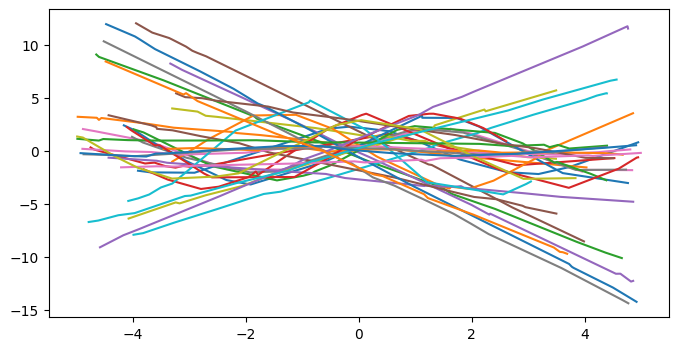

In [5]:
visualize_task(val_loader)

In [6]:
trainer.wandb_logging = True
if trainer.wandb_logging:
    wandb.init(project="local-np")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Currently logged in as: max-burzer (max-burzer-karlsruhe-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
train = True

if train:
    num_epochs = 400
    losses = trainer.train(
        num_epochs=num_epochs,
        max_clip_norm=cfg.training.max_clip_norm,
        alpha=cfg.training.alpha,
        validate=False,
    )
    # torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")

In [7]:
from dviforbml.evaluation.num_eval_np import num_eval_np


num_eval_np(model, val_loader, device, 1024, "test.csv")

/home/chickencurry/dviforbml/src/dviforbml/evaluation/predictive/pred_metrics.py:50: UserWarning: The operator 'aten::median' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  lmpl = torch.median(


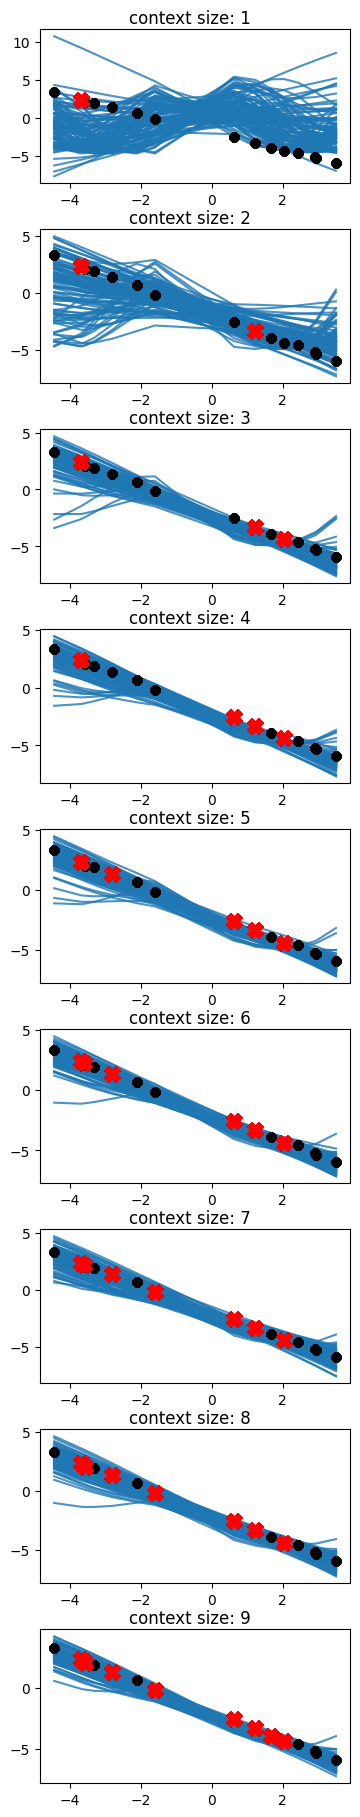

In [20]:
max_context_size = 9
num_samples = 100  # num_cells will be root

visualize_np(
    model=model,
    device=device,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    show_sigma=False,
)